In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
#df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data exploration and visualization

In [48]:
left = df[df.left==1]
left.shape

(3571, 10)

In [49]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [50]:
df.groupby('left').mean()

C:\Users\MOHIT RANJAN\AppData\Local\Temp\ipykernel_13560\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

Impact of salary on employee retentition

<Axes: xlabel='salary'>

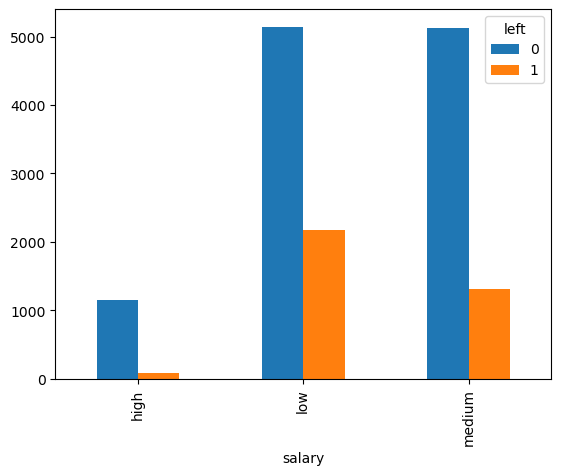

In [55]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Department wise employee retention

<Axes: xlabel='Department'>

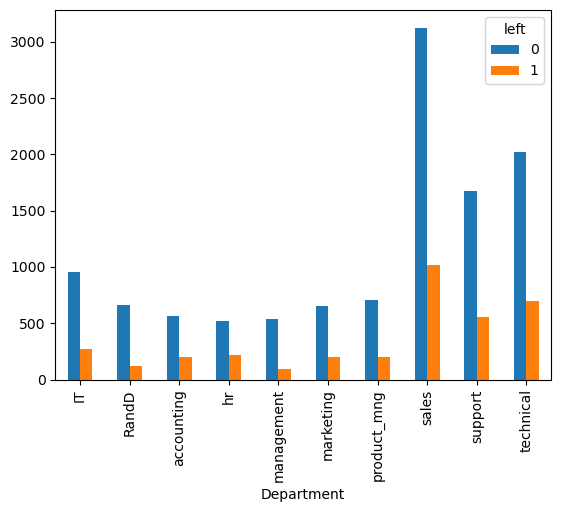

In [56]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

# From the data analysis so far we can conclude that we will use following variables as independant variables in our model


**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [57]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy var

In [59]:
sal_dummies = pd.get_dummies(subdf.salary)

In [62]:
df_with_dummies = pd.concat([subdf,sal_dummies],axis='columns')

In [63]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [64]:
df_with_dummies.drop('salary',axis='columns',inplace=True)

In [65]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [113]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [69]:
y = df.left

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.3)

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [95]:
model.fit(X_train,y_train)

LogisticRegression()

In [96]:
model.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Accuracy of the model

In [97]:
model.score(X,y)

0.7783852256817121

In [116]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [118]:
# Prepare the features of the specific employee for prediction
employee_features = [[0.40, 151, 0, 0, 1, 0]]  # Replace with the corresponding values

# Make the prediction
prediction = model.predict(employee_features)
prediction

# Interpret the prediction
if prediction == 1:
    print("Employee 14994 is predicted to leave the company.")
else:
    print("Employee 14994 is predicted to stay with the company.")

Employee 14994 is predicted to stay with the company.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
# Assuming you have a trained logistic regression model named 'model'

# Prepare the features of the employees for prediction
employee_features = [
    [0.38, 157, 0, 0, 1, 0],  # Employee 0 features
    [0.80, 262, 0, 0, 0, 1],  # Employee 1 features
    [0.11, 272, 0, 0, 0, 1]   # Employee 2 features
]  # Replace with the corresponding values

# Make the predictions
predictions = model.predict(employee_features)
predictions

# Interpret the predictions
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Employee {i} is predicted to leave the company.")
    else:
        print(f"Employee {i} is predicted to stay with the company.")

Employee 0 is predicted to stay with the company.
Employee 1 is predicted to stay with the company.
Employee 2 is predicted to leave the company.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Multiclass Classification

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [121]:
digits = load_digits()

In [122]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [123]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

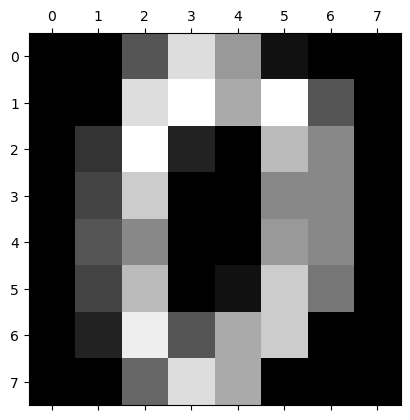

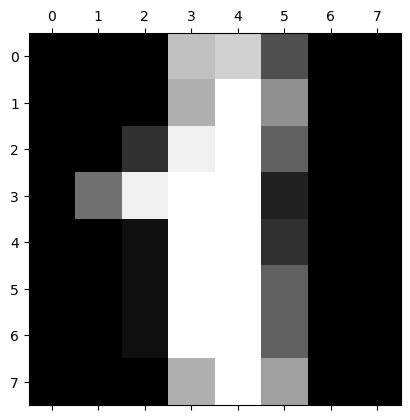

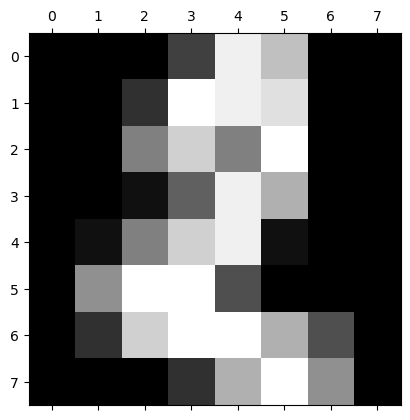

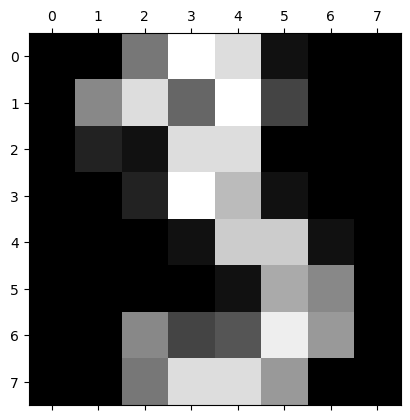

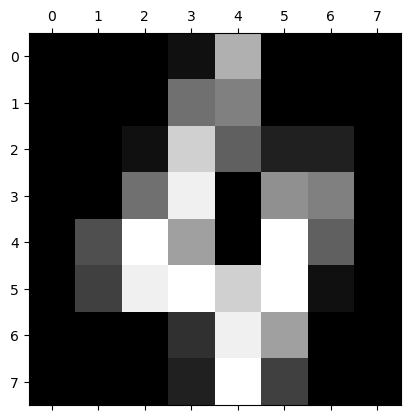

In [128]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [129]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [133]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [136]:
len(X_train)

1347

In [137]:
len(X_test)

450

In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [139]:
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
model.score(X_test,y_test)

0.9555555555555556

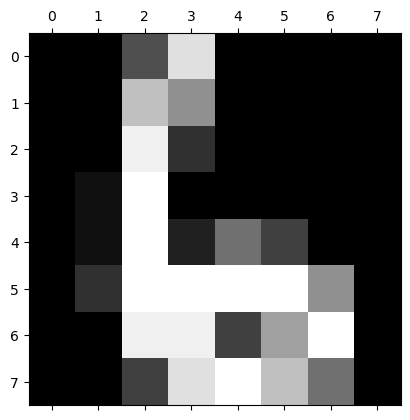

In [143]:
plt.matshow(digits.images[67])

In [144]:
digits.target[67]

6

In [146]:
model.predict([digits.data[67]])

array([6])

In [147]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [148]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 39,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 47,  0,  0,  0,  0,  1],
       [ 0,  1,  1,  0,  0, 36,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

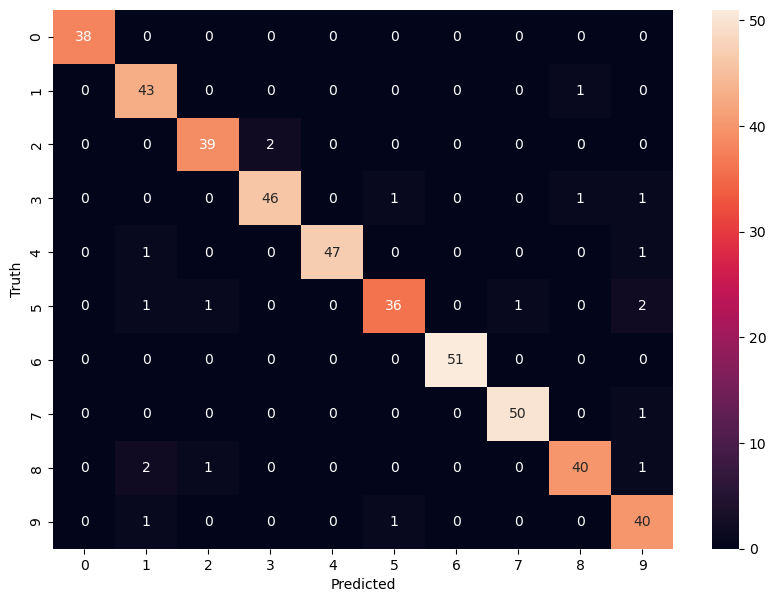

In [149]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')